<a href="https://colab.research.google.com/github/LuffyAnshul/StockPrediction/blob/master/stockPredict_Linear_DecisionTree_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [0]:
# Loading the Data

from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [0]:
# Store the data into a dataframe

df = pd.read_csv('NFLX.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-29,373.679993,374.579987,369.119995,371.829987,371.829987,3821700
1,2019-04-30,369.559998,374.500000,368.350006,370.540009,370.540009,3870100
2,2019-05-01,374.000000,385.989990,373.170013,378.809998,378.809998,9257300
3,2019-05-02,378.000000,383.500000,374.510010,379.059998,379.059998,5398200
4,2019-05-03,381.529999,385.029999,378.269989,385.029999,385.029999,5130300


In [0]:
# Get the number of training days
df.shape

(253, 7)

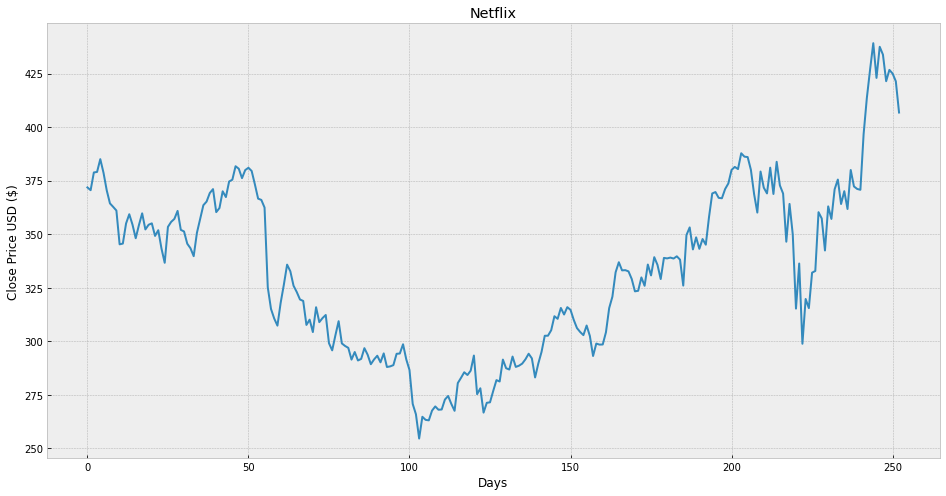

In [0]:
# Visualize the close price data
plt.figure(figsize=(16, 8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [0]:
# get the close price
df = df[['Close']]
df.head(4)

,Close
0,371.829987
1,370.540009
2,378.809998
3,379.059998


In [0]:
# Create Variable tp predict the 'x' days out into the future

future_days = 25

# Create new column { target data } shifted 'x' units/days
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Close,Prediction
249,426.700012,NaN
250,424.989990,NaN
251,421.380005,NaN
252,406.795013,NaN


In [0]:
# Create the feature dataset (X) and convert it to numpy array and remove last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[: -future_days]
print(X)

[[371.829987]
 [370.540009]
 [378.809998]
 [379.059998]
 [385.029999]
 [378.670013]
 [370.459991]
 [364.369995]
 [362.75    ]
 [361.040009]
 [345.26001 ]
 [345.609985]
 [354.98999 ]
 [359.309998]
 [354.450012]
 [348.109985]
 [354.269989]
 [359.730011]
 [352.209991]
 [354.390015]
 [355.059998]
 [349.190002]
 [351.850006]
 [343.279999]
 [336.630005]
 [353.399994]
 [355.730011]
 [357.130005]
 [360.869995]
 [352.01001 ]
 [351.269989]
 [345.559998]
 [343.429993]
 [339.730011]
 [350.619995]
 [357.119995]
 [363.519989]
 [365.209991]
 [369.209991]
 [371.040009]
 [360.299988]
 [362.200012]
 [370.019989]
 [367.320007]
 [374.600006]
 [375.429993]
 [381.720001]
 [380.549988]
 [376.160004]
 [379.929993]
 [381.      ]
 [379.5     ]
 [373.25    ]
 [366.600006]
 [365.98999 ]
 [362.440002]
 [325.209991]
 [315.100006]
 [310.619995]
 [307.299988]
 [317.940002]
 [326.459991]
 [335.779999]
 [332.700012]
 [325.929993]
 [322.98999 ]
 [319.5     ]
 [318.829987]
 [307.630005]
 [310.100006]
 [304.290009]
 [315.

In [0]:
# Create the target dataset (y) and convert to numpy array and get target values except last 'x'

y = np.array(df['Prediction'])[: -future_days]
print(y)

[353.399994 355.730011 357.130005 360.869995 352.01001  351.269989
 345.559998 343.429993 339.730011 350.619995 357.119995 363.519989
 365.209991 369.209991 371.040009 360.299988 362.200012 370.019989
 367.320007 374.600006 375.429993 381.720001 380.549988 376.160004
 379.929993 381.       379.5      373.25     366.600006 365.98999
 362.440002 325.209991 315.100006 310.619995 307.299988 317.940002
 326.459991 335.779999 332.700012 325.929993 322.98999  319.5
 318.829987 307.630005 310.100006 304.290009 315.899994 308.929993
 310.829987 312.279999 299.109985 295.76001  302.799988 309.380005
 298.98999  297.809998 296.929993 291.440002 294.980011 291.029999
 291.769989 296.779999 293.75     289.290009 291.519989 293.25
 290.170013 294.339996 287.98999  288.269989 288.859985 294.149994
 294.290009 298.600006 291.559998 286.600006 270.75     265.920013
 254.589996 264.75     263.309998 263.079987 267.619995 269.579987
 268.029999 268.149994 272.790009 274.459991 270.720001 267.529999
 280.

In [0]:
# Spilt into 75% training and 25% testing data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [0]:
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Create the linear Regression model
lr = LinearRegression().fit(x_train, y_train)

In [0]:
# Get the last 'x' rows fof featrue dataset
x_future = df.drop(['Prediction'], 1)[ :-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[387.779999],
       [386.190002],
       [386.      ],
       [380.070007],
       [368.700012],
       [360.089996],
       [379.23999 ],
       [371.709991],
       [369.029999],
       [381.049988],
       [368.769989],
       [383.790009],
       [372.779999],
       [368.970001],
       [346.48999 ],
       [364.130005],
       [349.920013],
       [315.25    ],
       [336.299988],
       [298.839996],
       [319.75    ],
       [315.470001],
       [332.029999],
       [332.829987],
       [360.269989]])

In [0]:
# Show model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[342.390015 342.390015 362.98999  357.119995 370.959991 375.5
 364.079987 353.399994 361.76001  379.959991 370.959991 371.119995
 302.799988 349.920013 413.549988 426.75     439.170013 291.440002
 437.48999  433.829987 291.769989 426.700012 348.519989 421.380005
 406.795013]

[364.32966319 363.40917456 363.2991777  359.86615791 353.28378626
 348.2992348  359.38564052 355.02633764 353.47482391 360.43349318
 353.32429768 362.01975918 355.64579177 353.44008958 340.42585457
 350.63809605 342.41157981 322.34025079 334.52661008 312.84009314
 324.94541222 322.46761482 332.05460772 332.51774058 348.40343721]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


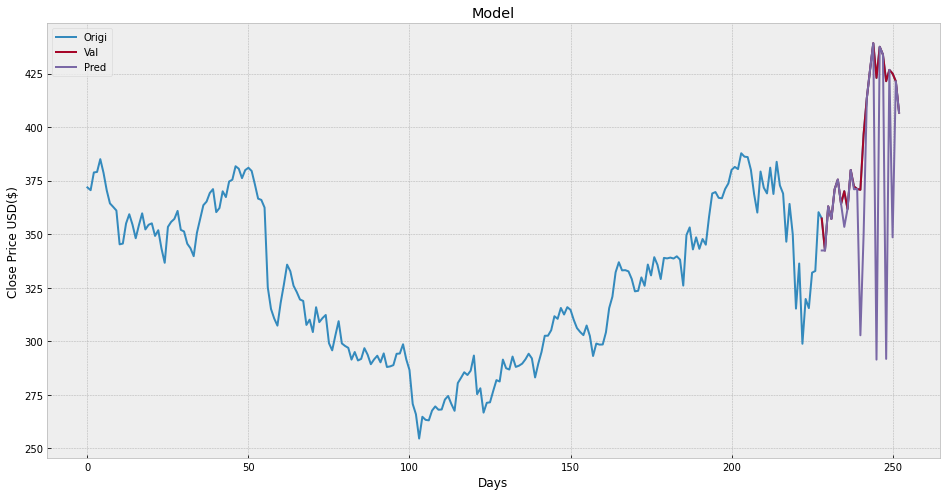

In [0]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]: ]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Origi', 'Val', 'Pred'])
plt.show()